# Regressão Logística


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import linear_model,datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

import tensorflow.compat.v1 as tf
%matplotlib inline


In [ ]:
def min_max_normalized(data):
    col_max = np.max(data, axis=0)
    col_min = np.min(data, axis=0)
    return np.divide(data - col_min, col_max - col_min)

In [ ]:


dataset = pd.read_csv('iris.csv')

dataset['Species'] = dataset['Name'].replace(['Iris-setosa', 'Iris-versicolor','Iris-virginica'], [1, 2, 3])
dataset['Species'].value_counts()




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   SepalLength  150 non-null    float64
 1   SepalWidth   150 non-null    float64
 2   PetalLength  150 non-null    float64
 3   PetalWidth   150 non-null    float64
 4   Name         150 non-null    object 
 5   Species      150 non-null    int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [ ]:
X = dataset.loc[:, ['SepalLength', 'SepalWidth', 'PetalLength', 'PetalWidth']]
y = dataset.loc[:, ['Species']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 0)

In [ ]:
X_train.shape, y_train.shape

print("Shape of X_train: ", X_train.shape)
print("Shape of y_train: ", y_train.shape)
print("Shape of X_test: ", X_test.shape)
print("Shape of y_test", y_test.shape)

Shape of X_train:  (135, 4)
Shape of y_train:  (135, 1)
Shape of X_test:  (15, 4)
Shape of y_test (15, 1)


In [ ]:

#tf.enable_eager_execution()
tf.compat.v1.disable_eager_execution()
W = tf.Variable(tf.zeros([4, 3]))
b = tf.Variable(tf.zeros([1]))

X = tf.placeholder(tf.float32, [None, 4])
y = tf.placeholder(tf.float32, [None, 1])

In [ ]:
learning_rate = 0.01
num_epochs = 1500
display_step = 1

y_ = tf.nn.softmax(tf.add(tf.matmul(X, W), b))
cost = tf.nn.softmax_cross_entropy_with_logits(labels=y, logits=y_)
optimizer = tf.train.GradientDescentOptimizer(learning_rate=learning_rate).minimize(cost)
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for epoch in range(num_epochs):
        cost_in_each_epoch = 0

        _, c = sess.run([optimizer, cost], feed_dict={X: X_train, y: y_train})
        cost_in_each_epoch += c


        #print(epoch)


    correct_prediction = tf.equal(tf.argmax(y_, 1), tf.argmax(y, 1))

    accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
    print("Accuracy:", accuracy.eval({X: X_test, y: y_test}))


TypeError: ignored

# 2º Exemplo com Regressão Logística

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt

# Carregar os dados da base iris.csv
data = pd.read_csv("iris.csv")

# Dividir os dados em um conjunto de treinamento e um conjunto de teste
X_train, X_test, y_train, y_test = train_test_split(data[["SepalLength", "SepalWidth", "PetalLength", "PetalWidth"]], data["Name"], test_size=0.2)

# Definir uma rede neural com uma camada oculta com 10 neurônios
model = tf.keras.Sequential([
    tf.keras.layers.Dense(10, activation="sigmoid", input_shape=(4,)),
    tf.keras.layers.Dense(3, activation="softmax")
])

# Definir a função de perda como a função de entropia cruzada
model.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

# Treinar a rede neural usando o conjunto de treinamento
model.fit(X_train, y_train, epochs=100)

# Avaliar a rede neural usando o conjunto de teste
score = model.evaluate(X_test, y_test, verbose=0)
print("Acurácia:", score[1])

# Previsões da rede neural para o conjunto de teste
y_pred = model.predict(X_test)

# Plotar o gráfico das previsões
for i in range(3):
    plt.scatter(X_test[y_test == i, 0], X_test[y_test == i, 1], c=plt.cm.Spectral(i / 3), label=data["Name"].unique()[i])
    plt.scatter(X_test[y_pred == i, 0], X_test[y_pred == i, 1], c=plt.cm.Spectral((i + 1) / 3), marker="*", label="Predição")

plt.xlabel("Comprimento da sépala")
plt.ylabel("Largura da sépala")
plt.legend()
plt.show()


Train on 120 samples
Epoch 1/100


ValueError: ignored

AttributeError: ignored

In [ ]:
import tensorflow as tf

In [ ]:
def min_max_normalized(data):
    col_max = np.max(data, axis=0)
    col_min = np.min(data, axis=0)
    return np.divide(data - col_min, col_max - col_min)

dataset = pd.read_csv('iris.csv')


dataset['Species'] = dataset['Name'].replace(['Iris-setosa', 'Iris-versicolor','Iris-virginica'], [1, 2, 3])
dataset['Species'].value_counts()

X = dataset.loc[:, ['SepalLength', 'SepalWidth', 'PetalLength', 'PetalWidth']]
y = dataset.loc[:, ['Species']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 0)

# Remover a linha que habilita o modo Eager
# tf.compat.v1.disable_eager_execution()

W = tf.Variable(tf.zeros([4, 3], dtype=tf.float64))
b = tf.Variable(tf.zeros([1], dtype=tf.float64))

learning_rate = 0.01
num_epochs = 1500
display_step = 1

y_ = tf.nn.softmax(tf.add(tf.matmul(X, W), b))
cost = tf.nn.softmax_cross_entropy_with_logits(labels=y, logits=y_)
optimizer = tf.keras.optimizers.SGD(loss=learning_rate).minimize(var_list=cost)

accuracy_history = []

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for epoch in range(num_epochs):
        correct_prediction = tf.equal(tf.argmax(y_, 1), tf.argmax(y, 1))
        accuracy = tf.cast(correct_prediction, tf.float32)

        _, c, acc = sess.run([optimizer, cost, accuracy], feed_dict={X: X_train, y: y_train})
        accuracy_history.append(acc)

    print("Final Accuracy:", accuracy.eval({X: X_test, y: y_test}))

# Plotar o gráfico de precisão
import matplotlib.pyplot as plt

plt.plot(range(num_epochs), accuracy_history)
plt.xlabel("Epoca")
plt.ylabel("Precisão")
plt.title("Precisão da Rede Neural por Epoca")
plt.show()


TypeError: ignored

In [ ]:
import numpy as np
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt

# Carrega os dados
data = pd.read_csv("iris.csv", names=["SepalLength", "SepalWidth", "PetalLength", "PetalWidth", "Name"])

# Separa os dados em características e classe
X = data[["SepalLength", "SepalWidth", "PetalLength", "PetalWidth"]].to_numpy()
y = data["Name"].to_numpy()

# Converte a classe para um vetor binário
classes = np.unique(y)
y_bin = np.isin(y, classes)

# Converte as características para um intervalo [0, 1]
X = X / np.max(X.abs())

# Define a arquitetura da rede neural
model = tf.keras.Sequential([
    tf.keras.layers.Dense(16, activation="relu"),
    tf.keras.layers.Dense(16, activation="relu"),
    tf.keras.layers.Dense(3, activation="sigmoid")
])

# Compila o modelo
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

# Treina o modelo
model.fit(X, y_bin, epochs=100)

# Faz as previsões
y_pred = model.predict(X)

# Calcula a acurácia
accuracy = np.mean(y_pred.argmax(axis=1) == y_bin)

print("Acurácia:", accuracy)

# Plota a matriz de confusão
plt.matshow(confusion_matrix(y_bin, y_pred.argmax(axis=1)))
plt.title("Matriz de confusão")
plt.show()


AttributeError: ignored

In [31]:
import pandas as pd
import tensorflow as tf
import numpy as np


In [32]:
# Carregando os dados
df = pd.read_csv("diabetes.csv")

# Separando os dados em atributos e rótulos
X = df.drop("Outcome", axis=1)
y = df["Outcome"]


In [33]:
# Normalizando os dados
X = (X - X.mean()) / X.std()

# Convertendo os rótulos para valores binários
y = y.replace({"Yes": 1, "No": 0})


In [34]:
# Criando uma rede neural com uma camada oculta de 10 neurônios
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(10, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

# Compilando a rede neural
model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])


In [35]:
# Dividindo os dados em conjuntos de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)

# Treinando a rede neural
X_train = np.array(X_train)
y_train = np.array(y_train)
model.fit(X_train, y_train, epochs=100)


NameError: ignored

In [ ]:
# Avaliando a rede neural no conjunto de teste
loss, accuracy = model.evaluate(X_test, y_test)

print("Accuracy:", accuracy)


3/3 [==============================] - 0s 9ms/step - loss: 0.5147 - accuracy: 0.7922
Accuracy: 0.7922077775001526


In [27]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt



# Gerando os dados
def generate_data(n_samples):
    class1 = np.random.rand(n_samples // 2, 2) * 2 - 1
    class2 = np.random.rand(n_samples // 2, 2) + 1
    data = np.vstack([class1, class2])
    labels = np.hstack([np.ones(n_samples // 2), np.zeros(n_samples // 2)])
    return data, labels

# Dividindo os dados em treino e teste
def split_data(data, labels, train_size):
    train_size = int(train_size * data.shape[0])
    indices = np.random.permutation(data.shape[0])
    X_train = data[indices[:train_size]]
    y_train = labels[indices[:train_size]]
    X_test = data[indices[train_size:]]
    y_test = labels[indices[train_size:]]
    return X_train, y_train, X_test, y_test

# Criando a rede neural
def create_network(input_shape):
    model = tf.keras.models.Sequential([
        tf.keras.layers.Dense(10, activation="relu", input_shape=input_shape),
        tf.keras.layers.Dense(1, activation="sigmoid")
    ])
    return model

# Treinando a rede neural
def train_network(model, X_train, y_train, epochs):
    model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])
    model.fit(X_train, y_train, epochs=epochs)
    return model

# Avaliando a rede neural
def evaluate_network(model, X_test, y_test):
    loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
    return loss, accuracy

# Gerando os dados
data, labels = generate_data(1000)

# Dividindo os dados em treino e teste
X_train, y_train, X_test, y_test = split_data(data, labels, 0.8)

# Criando a rede neural
input_shape = (X_train.shape[1],)
model = create_network(input_shape)

# Treinando a rede neural
model = train_network(model, X_train, y_train, 100)

# Avaliando a rede neural
loss, accuracy = evaluate_network(model, X_test, y_test)


# Plotando a curva de treinamento/validação
history = model.history

# Convertendo a variável history para um dicionário


# Obtendo as perdas de treinamento e validação
losses = history.history["loss"]
#val_losses = history.history["val_loss"]

# Plotando as perdas
plt.plot(losses, label="Treinamento")
#plt.plot(val_losses, label="Validação")
plt.legend()
plt.show()

Epoch 1/100
25/25 [==============================] - 1s 4ms/step - loss: 0.5699 - accuracy: 0.8275
Epoch 2/100
25/25 [==============================] - 0s 4ms/step - loss: 0.5163 - accuracy: 0.8225
Epoch 3/100
25/25 [==============================] - 0s 4ms/step - loss: 0.4745 - accuracy: 0.8288
Epoch 4/100
25/25 [==============================] - 0s 4ms/step - loss: 0.4403 - accuracy: 0.8438
Epoch 5/100
25/25 [==============================] - 0s 4ms/step - loss: 0.4109 - accuracy: 0.8550
Epoch 6/100
25/25 [==============================] - 0s 4ms/step - loss: 0.3850 - accuracy: 0.8662
Epoch 7/100
25/25 [==============================] - 0s 4ms/step - loss: 0.3613 - accuracy: 0.8763
Epoch 8/100
25/25 [==============================] - 0s 4ms/step - loss: 0.3393 - accuracy: 0.8875
Epoch 9/100
25/25 [==============================] - 0s 4ms/step - loss: 0.3189 - accuracy: 0.8938
Epoch 10/100
25/25 [==============================] - 0s 5ms/step - loss: 0.2997 - accuracy: 0.9000
Epoch 11/

KeyError: ignored

In [25]:
import pandas as pd
import tensorflow as tf

# Carregando os dados
df = pd.read_csv("diabetes.csv")

# Separando os dados em atributos e rótulos
X = df.drop("Outcome", axis=1)
y = df["Outcome"]

# Dividindo os dados em treino e teste
train_size = int(0.8 * len(X))
test_size = len(X) - train_size

X_train = X[train_size:]
y_train = y[train_size:]
X_test = X[:train_size]
y_test = y[:train_size]

# Criando a rede neural
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(10, activation="relu", input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

# Compilando a rede neural
model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# Treinando a rede neural
history = model.fit(X_train, y_train, epochs=100)

# Avaliando a rede neural no conjunto de teste
loss, accuracy = model.evaluate(X_test, y_test)

# Plotando a curva de treinamento/validação

# Obtendo as perdas de treinamento e validação
loss = history.history["loss"]
#val_loss = history.history["val_metrics"]

#val_losses = history.history["val_loss"]
#val_loss = model.history.val_loss
#val_loss = history.history.get("val_loss")



# Plotando as perdas
plt.plot(loss, label="Treinamento")
plt.plot(val_loss, label="Validação")
plt.legend()
plt.show()


Epoch 1/100
5/5 [==============================] - 1s 4ms/step - loss: 29.7702 - accuracy: 0.3571
Epoch 2/100
5/5 [==============================] - 0s 7ms/step - loss: 27.7961 - accuracy: 0.3571
Epoch 3/100
5/5 [==============================] - 0s 6ms/step - loss: 25.8600 - accuracy: 0.3571
Epoch 4/100
5/5 [==============================] - 0s 6ms/step - loss: 23.8778 - accuracy: 0.3571
Epoch 5/100
5/5 [==============================] - 0s 6ms/step - loss: 22.0546 - accuracy: 0.3571
Epoch 6/100
5/5 [==============================] - 0s 7ms/step - loss: 20.1033 - accuracy: 0.3571
Epoch 7/100
5/5 [==============================] - 0s 6ms/step - loss: 18.2053 - accuracy: 0.3571
Epoch 8/100
5/5 [==============================] - 0s 6ms/step - loss: 16.3021 - accuracy: 0.3571
Epoch 9/100
5/5 [==============================] - 0s 5ms/step - loss: 14.4242 - accuracy: 0.3571
Epoch 10/100
5/5 [==============================] - 0s 5ms/step - loss: 12.5491 - accuracy: 0.3571
Epoch 11/100
5/5 [=

KeyError: ignored

Epoch 1/100
5/5 [==============================] - 1s 7ms/step - loss: 32.7368 - accuracy: 0.3571
Epoch 2/100
5/5 [==============================] - 0s 6ms/step - loss: 30.6417 - accuracy: 0.3571
Epoch 3/100
5/5 [==============================] - 0s 5ms/step - loss: 28.4606 - accuracy: 0.3571
Epoch 4/100
5/5 [==============================] - 0s 6ms/step - loss: 26.3840 - accuracy: 0.3571
Epoch 5/100
5/5 [==============================] - 0s 8ms/step - loss: 24.4070 - accuracy: 0.3571
Epoch 6/100
5/5 [==============================] - 0s 4ms/step - loss: 22.3777 - accuracy: 0.3636
Epoch 7/100
5/5 [==============================] - 0s 5ms/step - loss: 20.4354 - accuracy: 0.3831
Epoch 8/100
5/5 [==============================] - 0s 6ms/step - loss: 18.7549 - accuracy: 0.4221
Epoch 9/100
5/5 [==============================] - 0s 5ms/step - loss: 17.4108 - accuracy: 0.4416
Epoch 10/100
5/5 [==============================] - 0s 9ms/step - loss: 16.4105 - accuracy: 0.4545
Epoch 11/100
5/5 [=

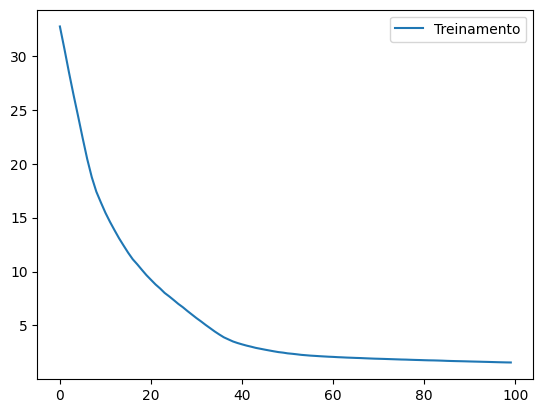

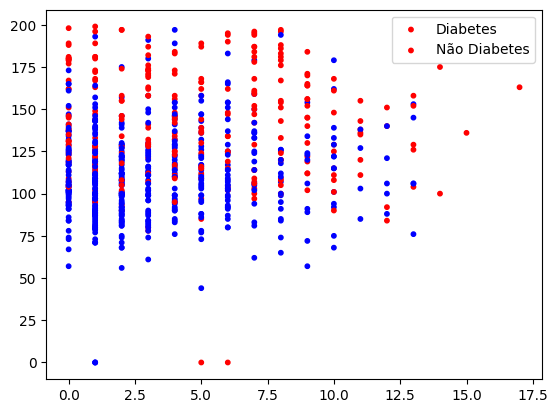

In [29]:
import pandas as pd
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

# Carregando os dados
df = pd.read_csv("diabetes.csv")

# Separando os dados em atributos e rótulos
X = df.drop("Outcome", axis=1)
y = df["Outcome"]

# Dividindo os dados em treino e teste
train_size = int(0.8 * len(X))
test_size = len(X) - train_size

X_train = X[train_size:]
y_train = y[train_size:]
X_test = X[:train_size]
y_test = y[:train_size]

# Criando a rede neural
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(10, activation="relu", input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

# Compilando a rede neural
model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# Treinando a rede neural
history = model.fit(X_train, y_train, epochs=100)

# Avaliando a rede neural no conjunto de teste
loss, accuracy = model.evaluate(X_test, y_test)

# Plotando a curva de treinamento/validação

# Obtendo as perdas de treinamento e validação
loss = history.history["loss"]
#val_loss = history.history["val_loss"]

# Plotando as perdas
plt.plot(loss, label="Treinamento")
#plt.plot(val_loss, label="Validação")
plt.legend()
plt.show()

# Plotando a separação dos dados

# Atribuindo os dados de treinamento e teste às variáveis X_train e X_test
X_treino = X_train.to_numpy()
X_teste = X_test.to_numpy()

# Plotando os dados de treinamento
plt.scatter(X_treino[:, 0], X_treino[:, 1], c=y_train, cmap="bwr", s=10)

# Plotando os dados de teste
plt.scatter(X_teste[:, 0], X_teste[:, 1], c=y_test, cmap="bwr", s=10)

# Adicionando uma legenda ao gráfico
plt.legend(["Diabetes", "Não Diabetes"])

# Exibindo o gráfico
plt.show()
